In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
comm =pd.read_excel('Ecommerce Customers.xlsx',sheet_name='Ecommerce Customers')

In [5]:
comm.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly_Amount_spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly_Amount_spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


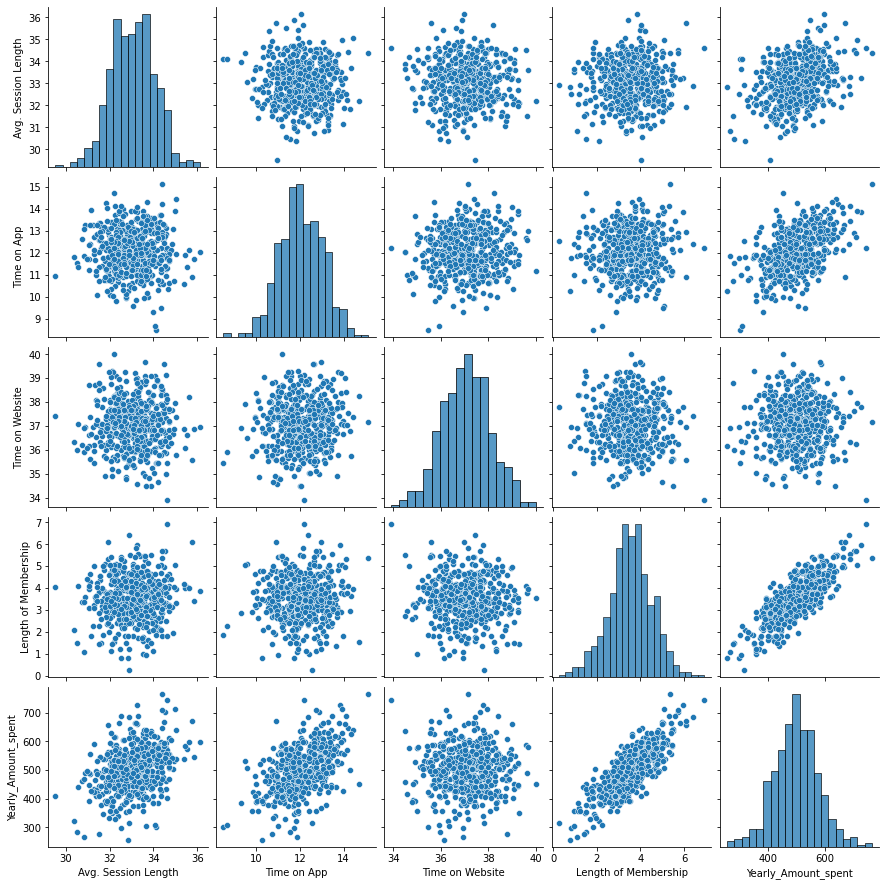

In [7]:
sns.pairplot(comm)

In [8]:
comm.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly_Amount_spent'],
      dtype='object')

In [9]:
x=comm[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = comm['Yearly_Amount_spent']

In [10]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [11]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [12]:
print(lr.coef_)

[25.82792018 38.80900145  0.28174274 61.30479927]


In [13]:
print(lr.intercept_)

-1048.8204290065023


In [14]:
coef = pd.DataFrame(data =lr.coef_, index= x.columns, columns=['Coefficients'] )

In [15]:
coef

,Coefficients
Avg. Session Length,25.827920
Time on App,38.809001
Time on Website,0.281743
Length of Membership,61.304799


In [16]:
pred = lr.predict(x_test)

In [17]:
pred

array([498.81705536, 519.53403729, 562.94886718, 478.90501346,
       423.8201042 , 508.9452329 , 478.79059717, 460.08112597,
       519.38576043, 439.12699354, 487.54907742, 525.96826109,
       577.12393843, 553.53565548, 685.14181281, 473.40359409,
       314.71860742, 458.39761038, 452.38929377, 461.05452656,
       456.35300072, 332.21392109, 504.18566874, 401.88060608,
       766.19989355, 425.98233166, 513.22023323, 476.80244451,
       306.817882  , 590.05645167, 505.29246026, 390.12626034,
       463.7152543 , 316.10191094, 465.93448787, 549.73327826,
       619.77113721, 591.76573022, 495.80310959, 402.82346134,
       506.99424985, 547.62013178, 422.98145388, 558.84117357,
       441.84404018, 432.93355219, 430.19970737, 507.00591399,
       425.73050946, 402.16982748, 553.00099819, 353.71999664,
       639.24296314, 478.49076533, 452.15843176, 621.4676865 ,
       326.0497008 , 491.38826582, 411.86794125, 549.10581517,
       587.73075486, 547.94268826, 567.83335035, 588.73

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test,pred))
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('RMsE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 7.099124594093891
MSE: 80.90062369760102
RMsE: 8.994477399916073


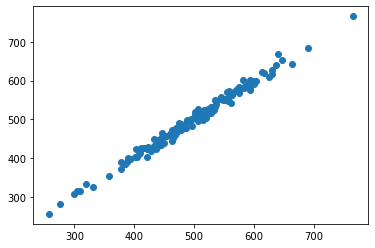

In [20]:
plt.scatter(y_test,pred)

In [22]:
finalcomm = pd.DataFrame({'Actual': y_test, 'Predicted' : pred})

In [23]:
finalcomm

,Actual,Predicted
304,494.687156,498.817055
340,501.122492,519.534037
47,563.672873,562.948867
67,469.310861,478.905013
479,402.167122,423.820104
...,...,...
331,533.040060,524.193238
197,662.961088,643.612665
95,543.340166,553.596995
122,514.239521,498.629595
